In [1]:
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#  input all training data
# prepare for saving data
training_data = []
training_label = []
rows = 32
cols = 32
# prepare for inputting data
prior_num = 0
os.getcwd()                                         # get the location of the fold
fold_loc = os.getcwd() + '\digits\\trainingDigits'
while prior_num < 10:
    front = str(prior_num)
    last = 0
    while 1:
        file ='\\' + front + '_' + str(last) + '.txt'
        tf = os.path.exists(fold_loc + file)
        if tf : # exist route
            # print(fold_loc + file)
            f = open(fold_loc + file)
            lines = f.readlines()
            training = []
            training_label.append(prior_num) # save label of training data
            row = 0
            while row < rows:# transfer str to number
                list_line = list(lines[row])
                list_line.pop()
                col = 0
                while col < cols:
                    list_line[col]=int(list_line[col])
                    col = col + 1
                training= training +list_line
                row = row + 1
                f.close()
            training_data.append(training)
            #print('saving data in training_data')
            last = last + 1
        else :
            #print(front+' is OK')
            break
    prior_num = prior_num + 1

np.matrix(training_data)
print('Training data size is '+str(len(training_data))+'*'+str(len(training_data[0])))

Training data size is 1934*1024


In [2]:
#  input all test data
# prepare for saving data
test_data = []
test_label = []
rows = 32
cols = 32
# prepare for inputting data
prior_num = 0
os.getcwd()                                         # get the location of the fold
fold_loc = os.getcwd() + '\digits\\testDigits'
while prior_num < 10:
    front = str(prior_num)
    last = 0
    while 1:
        file ='\\' + front + '_' + str(last) + '.txt'
        tf = os.path.exists(fold_loc + file)
        if tf : # exist route
            # print(fold_loc + file)
            f = open(fold_loc + file)
            lines = f.readlines()
            test = []
            test_label.append(prior_num) # save label of training data
            row = 0
            while row < rows:  # transfer str to number
                list_line = list(lines[row])
                list_line.pop()
                col = 0
                while col < cols:
                    list_line[col]=int(list_line[col])
                    col = col + 1
                test = test +list_line
                row = row + 1
                f.close()
            test_data.append(test)
            #print('saving data in test_data')
            last = last + 1
        else :
            #print(front+' is OK')
            break
    prior_num = prior_num + 1

np.matrix(test_data)
print('Test data size is '+str(len(test_data))+'*'+str(len(test_data[0])))

Test data size is 946*1024


Saving figure figure0
prior_num is 0


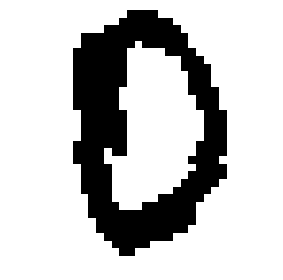

Saving figure figure1
prior_num is 1


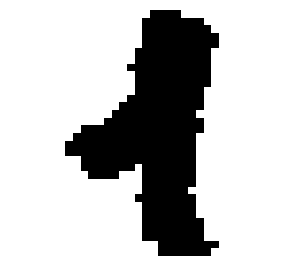

Saving figure figure2
prior_num is 2


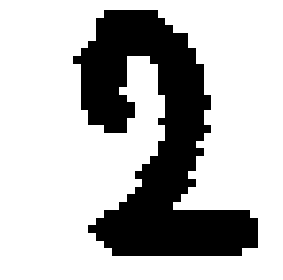

Saving figure figure3
prior_num is 3


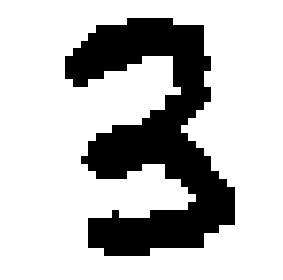

Saving figure figure4
prior_num is 4


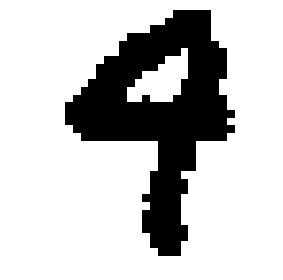

Saving figure figure5
prior_num is 5


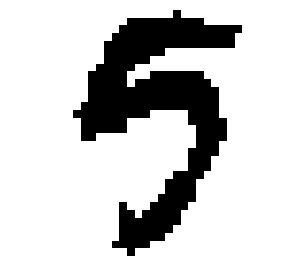

Saving figure figure6
prior_num is 6


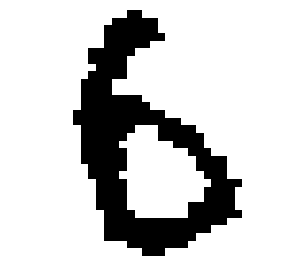

Saving figure figure7
prior_num is 7


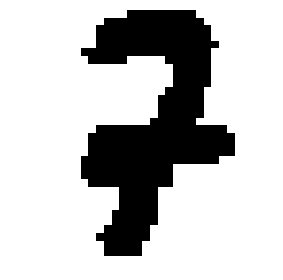

Saving figure figure8
prior_num is 8


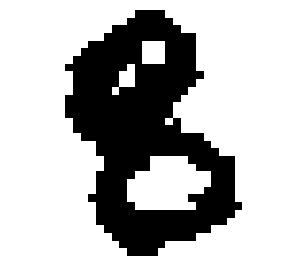

Saving figure figure9
prior_num is 9


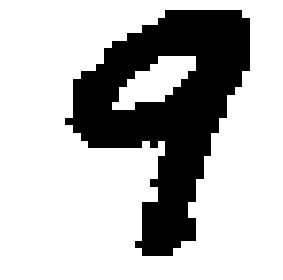

In [7]:
# plot all figures
import matplotlib.pyplot as plt
from matplotlib import interactive
import numpy as np
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(os.getcwd() + '\digits\\trainingDigits', fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
prior_num = 0
os.getcwd()                                         # get the location of the fold
fold_loc = os.getcwd() + '\digits\\trainingDigits'
some_digit_image = np.zeros((32,32))

while prior_num < 10:
    front = str(prior_num)
    last = 0
    file ='\\' + front + '_' + str(last) + '.txt'
    tf = os.path.exists(fold_loc + file)
    if tf :
        file = open(fold_loc + file)
        count=0
        for line in file.readlines():
            for i in range(0,32):
               some_digit_image[count][i] = line[i]
            count = count + 1
    plt.imshow(some_digit_image, cmap=plt.cm.Greys,
      interpolation="nearest")
    plt.axis("off")
    save_fig("figure"+front)
    print('prior_num is ' +str( prior_num))
    prior_num = prior_num + 1
    interactive(True)
    plt.show()

In [4]:
# Naive Bayes
clf = MultinomialNB()
clf.fit(training_data,training_label)
NB_result = clf.predict(test_data)
error_i = 0
error = 0
while error_i < len(NB_result):
    test = NB_result[error_i] - test_label[error_i]
    error_i = error_i + 1
    if test != 0:
        error = error +1
NB_error_ratio = error/len(NB_result)
print('Naive Bayes error ratio of test data is '+str(NB_error_ratio))

Naive Bayes error ratio of test data is 0.07610993657505286


In [5]:
# Naive Bayes
clf = MultinomialNB()
clf.fit(training_data,training_label)
NB_result = clf.predict(training_data)
error_i = 0
error = 0
while error_i < len(NB_result):
    test = NB_result[error_i] - training_label[error_i]
    error_i = error_i + 1
    if test != 0:
        error = error +1
NB_error_ratio = error/len(NB_result)
print('Naive Bayes error ratio of training data is '+str(NB_error_ratio))

Naive Bayes error ratio of training data is 0.07238883143743537


In [6]:
# KNN
neighbors = 1
x_axis = []
y_axis = []
while neighbors < 11:
    x_axis.append(neighbors)
    neigh = KNeighborsClassifier(n_neighbors=neighbors)
    neigh.fit(training_data, training_label)
    knn_result = neigh.predict(test_data)
    error_i = 0
    error = 0
    while error_i < len(knn_result):
        test = knn_result[error_i] - test_label[error_i]
        error_i = error_i + 1
        if test != 0:
            error = error +1
    knn_error_ratio = error/len(knn_result)
    y_axis.append(knn_error_ratio)
    print('k is '+str(neighbors)+', KNN error ratio is '+str(knn_error_ratio))
    neighbors = neighbors + 1

k is 1, KNN error ratio is 0.013742071881606765
k is 2, KNN error ratio is 0.023255813953488372
k is 3, KNN error ratio is 0.012684989429175475
k is 4, KNN error ratio is 0.016913319238900635
k is 5, KNN error ratio is 0.019027484143763214
k is 6, KNN error ratio is 0.023255813953488372
k is 7, KNN error ratio is 0.023255813953488372
k is 8, KNN error ratio is 0.023255813953488372
k is 9, KNN error ratio is 0.02748414376321353
k is 10, KNN error ratio is 0.024312896405919663


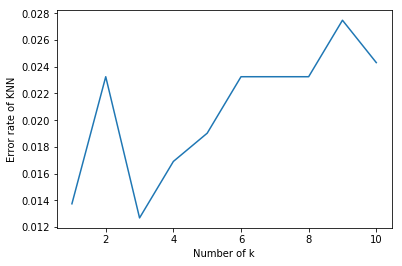

In [7]:
y_axis = np.array(y_axis)
plt.figure()
plt.xlabel("Number of k")
plt.ylabel("Error rate of KNN") 
plt.plot(x_axis, y_axis)
plt.savefig("Error rate of KNN.pdf")
interactive(True)
plt.show()

In [2]:
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

training_number=10
x_axis= []
NB_training_result = []
KNN_training_result = []
NB_test_result = []
KNN_test_result = []
rows = 32
cols = 32
while training_number <= 180:
    training_data = []
    training_label = []
    # prepare for inputting data
    prior_num = 0
    os.getcwd()                                         # get the location of the fold
    fold_loc = os.getcwd() + '\digits\\trainingDigits'
    while prior_num < 10:
      front = str(prior_num)
      last = 0
      training_set_number = 0
      while training_set_number < training_number:
          file ='\\' + front + '_' + str(last) + '.txt'
          tf = os.path.exists(fold_loc + file)
          if tf : # exist route
              f = open(fold_loc + file)
              lines = f.readlines()
              training = []
              training_label.append(prior_num) # save label of training data
              row = 0
              while row < rows:# transfer str to number
                  list_line = list(lines[row])
                  list_line.pop()
                  col = 0
                  while col < cols:
                      list_line[col]=int(list_line[col])
                      col = col + 1
                  training= training +list_line
                  row = row + 1
                  f.close()
              training_data.append(training)
              last = last + 1
          else :
              break
          training_set_number = training_set_number + 1
      prior_num = prior_num + 1
    np.matrix(training_data)
    #  input all test data
    # prepare for saving data
    test_data = []
    test_label = []
    # prepare for inputting data
    prior_num = 0
    os.getcwd()                                         # get the location of the fold
    fold_loc = os.getcwd() + '\digits\\testDigits'
    while prior_num < 10:
      front = str(prior_num)
      last = 0
      while 1:
          file ='\\' + front + '_' + str(last) + '.txt'
          tf = os.path.exists(fold_loc + file)
          if tf : # exist route
              # print(fold_loc + file)
              f = open(fold_loc + file)
              lines = f.readlines()
              test = []
              test_label.append(prior_num) # save label of training data
              row = 0
              while row < rows:  # transfer str to number
                  list_line = list(lines[row])
                  list_line.pop()
                  col = 0
                  while col < cols:
                      list_line[col]=int(list_line[col])
                      col = col + 1
                  test = test +list_line
                  row = row + 1
                  f.close()
              test_data.append(test)
              last = last + 1
          else :
              break
      prior_num = prior_num + 1
    np.matrix(test_data)
    # KNN of test
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(training_data, training_label)
    knn_result = neigh.predict(test_data)
    error_i = 0
    error = 0
    while error_i < len(knn_result):
      test = knn_result[error_i] - test_label[error_i]
      error_i = error_i + 1
      if test != 0:
          error = error +1
    knn_error_ratio = error/len(knn_result)
    KNN_test_result.append(knn_error_ratio)
    # KNN of training
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(training_data, training_label)
    knn_result = neigh.predict(training_data)
    error_i = 0
    error = 0
    while error_i < len(knn_result):
      test = knn_result[error_i] - training_label[error_i]
      error_i = error_i + 1
      if test != 0:
          error = error +1
    knn_error_ratio = error/len(knn_result)
    KNN_training_result.append(knn_error_ratio)
    # Naive Bayes of test
    clf = MultinomialNB()
    clf.fit(training_data,training_label)
    NB_result = clf.predict(test_data)
    error_i = 0
    error = 0
    while error_i < len(NB_result):
      test = NB_result[error_i] - test_label[error_i]
      error_i = error_i + 1
      if test != 0:
          error = error +1
    NB_error_ratio = error/len(NB_result)
    NB_test_result.append(NB_error_ratio)
    # Naive Bayes of training
    clf = MultinomialNB()
    clf.fit(training_data,training_label)
    NB_result = clf.predict(training_data)
    error_i = 0
    error = 0
    while error_i < len(NB_result):
      test = NB_result[error_i] - training_label[error_i]
      error_i = error_i + 1
      if test != 0:
          error = error +1
    NB_error_ratio = error/len(NB_result)
    NB_training_result.append(NB_error_ratio)
    x_axis.append(training_number)
    print('training number is '+str(training_number))
    training_number = training_number + 10
print('NB training result is '+ str(NB_training_result))
print('KNN training result is '+ str(KNN_training_result))
print('NB test result is '+ str(NB_test_result))
print('KNN test result is '+str(KNN_test_result))

training number is 10
training number is 20
training number is 30
training number is 40
training number is 50
training number is 60
training number is 70
training number is 80
training number is 90
training number is 100
training number is 110
training number is 120
training number is 130
training number is 140
training number is 150
training number is 160
training number is 170
training number is 180
NB training result is [0.02, 0.045, 0.07, 0.0725, 0.058, 0.05333333333333334, 0.06142857142857143, 0.06625, 0.06444444444444444, 0.067, 0.06636363636363636, 0.06583333333333333, 0.06615384615384616, 0.07285714285714286, 0.07333333333333333, 0.07375, 0.07411764705882352, 0.07611111111111112]
KNN training result is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
NB test result is [0.18816067653276955, 0.14693446088794926, 0.14587737843551796, 0.13636363636363635, 0.10359408033826638, 0.1014799154334038, 0.08879492600422834, 0.0919661733615222, 0.08

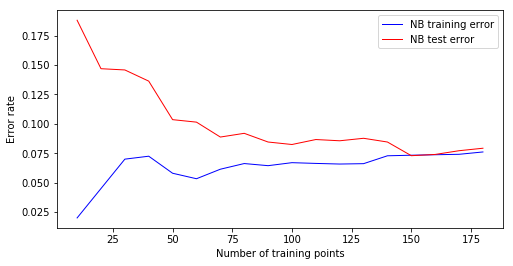

In [4]:
import matplotlib.pyplot as plt
from matplotlib import interactive
plt.figure(figsize=(8,4))
plt.plot(x_axis,NB_training_result,"b",label = 'NB training error', linewidth=1)
plt.plot(x_axis,NB_test_result,"r",label = 'NB test error',linewidth=1)
plt.xlabel("Number of training points")
plt.ylabel("Error rate")
plt.legend()
plt.savefig("NaiveBayes Result.pdf")
interactive(True)
plt.show()

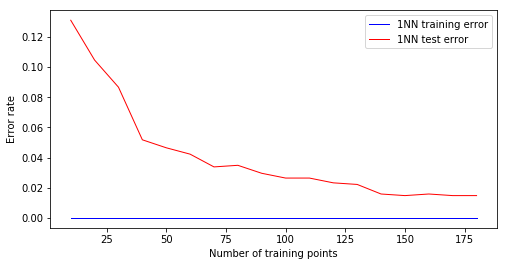

In [5]:
plt.figure(figsize=(8,4))
plt.plot(x_axis,KNN_training_result,"b",label = '1NN training error', linewidth=1)
plt.plot(x_axis,KNN_test_result,"r",label = '1NN test error',linewidth=1)
plt.xlabel("Number of training points")
plt.ylabel("Error rate")
plt.legend()
plt.savefig("1NN Result.pdf")
interactive(True)
plt.show()

In [6]:
#MNIST
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='custom_data_home')
x, y = mnist["data"], mnist["target"]
x_train = x.reshape(len(x),784)
#get test data
test_data = []
test_label = []
rows = 32
cols = 32
prior_num = 0
prior_num = 0
os.getcwd()                                         # get the location of the fold
fold_loc = os.getcwd() + '\digits\\testDigits'
while prior_num < 10:
    front = str(prior_num)
    last = 0
    while 1:
        file ='\\' + front + '_' + str(last) + '.txt'
        tf = os.path.exists(fold_loc + file)
        if tf : # exist route
            # print(fold_loc + file)
            f = open(fold_loc + file)
            lines = f.readlines()
            test = []
            test_label.append(prior_num) # save label of training data
            row = 0
            while row < rows:  # transfer str to number
                list_line = list(lines[row])
                list_line.pop()
                col = 0
                while col < cols:
                    list_line[col]=int(list_line[col])
                    col = col + 1
                test = test +list_line
                row = row + 1
                f.close()
            test_data.append(test)
            last = last + 1
        else :
            break
    prior_num = prior_num + 1
np.matrix(test_data)
i = 0
new_test_data =[]
while i < len(test_data):
    testi = np.reshape(test_data[i],(32,32))
    testj=testi[2:30,2:30]
    new_test_data.append(testj.flatten())
    i = i + 1
np.matrix(new_test_data)
# KNN with MNIST data
print(-1)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x, y)
knn_result = neigh.predict(new_test_data)
error_i = 0
error = 0
while error_i < len(knn_result):
    test = knn_result[error_i] - test_label[error_i]
    error_i = error_i + 1
    if test != 0:
        error = error +1

knn_error_ratio = error/len(knn_result)
print('KNN error rate with MNIST is '+str(knn_error_ratio))
# Naive Bayes
clf = MultinomialNB()
clf.fit(x,y)
NB_result = clf.predict(new_test_data)
error_i = 0
error = 0
while error_i < len(NB_result):
    test = NB_result[error_i] - test_label[error_i]
    error_i = error_i + 1
    if test != 0:
        error = error +1
NB_error_ratio = error/len(NB_result)
print('Naive Bayes error rate with MNIST is '+str(NB_error_ratio))

-1
KNN error rate with MNIST is 0.8974630021141649
Naive Bayes error rate with MNIST is 0.912262156448203
